# Прогноз знака абсолютов на завтра (мультирегрессия на катбусте)



Проект:	**Абсолютный курс**
	
сайт	http://www.abscur.ru

ВКонтакте	https://vk.com/abscur

FaceBook	https://www.facebook.com/abscur

WhatsUp	https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber	https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram	https://t.me/AbsCur

Одноклассники	https://ok.ru/group/53547043520717

Twitter	https://twitter.com/abscurs

GitHub	https://github.com/prog815/abscur

YouTube	https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

# Статья

На Google.Docs https://docs.google.com/document/d/1jM0cxCgItzlRBBjaJUAjYmwgb9vx6WfrwEU4y_aT71Y/edit?usp=sharing

На Habr 

На VC 

На Smart-lab 

# Подгружаем библиотеки

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split

import os
import pickle
import datetime

import lib_prepare
import lib_ga

import catboost

import matplotlib.pyplot as plt

# загружаем таблицу

In [2]:
data = pd.read_csv('../input/abscur/close_abs.csv',index_col='Date')
data

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-27,12.707662,12.628152,2.134768,0.147652,1.832696,16.570447,16.417864,17.473901,2.408537,0.647274,...,0.159669,4.052841,4.551821,3.879304,4.419022,0.475588,4.604194,0.540564,0.617678,0.000728
2017-02-28,12.735078,12.582107,2.137765,0.147133,1.831139,16.590732,16.433774,17.556971,2.416267,0.650186,...,0.158460,4.072045,4.558770,3.893076,4.429747,0.476198,4.599721,0.541261,0.613563,0.000729
2017-03-01,12.688710,12.474608,2.139114,0.146810,1.835955,16.606034,16.491160,17.539620,2.419103,0.649514,...,0.158606,4.076471,4.563100,3.884907,4.433714,0.475409,4.559342,0.541972,0.610965,0.000742
2017-03-02,12.743684,12.463166,2.143677,0.145797,1.837701,16.641409,16.469319,17.527312,2.419234,0.648854,...,0.159020,4.097466,4.572695,3.878483,4.443634,0.475333,4.558665,0.541061,0.619561,0.000740
2017-03-03,12.627507,12.455957,2.148750,0.145841,1.837562,16.679247,16.458753,17.520745,2.422956,0.648545,...,0.161214,4.078295,4.583092,3.878444,4.453619,0.475924,4.475536,0.541798,0.622755,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,13.442567,14.717501,2.397480,0.162757,2.004086,18.698865,20.326227,21.246254,2.952562,0.874581,...,0.106820,4.701033,5.137051,4.306312,4.986364,0.582465,1.382786,0.671734,0.666517,0.000821
2022-02-21,13.437193,14.688083,2.402213,0.162983,1.993264,18.734885,20.345770,21.205819,2.963032,0.872542,...,0.106995,4.685385,5.146946,4.299852,4.993839,0.583060,1.376747,0.672224,0.667358,0.000821
2022-02-22,13.472992,14.700175,2.403827,0.163613,1.986585,18.747253,20.473565,21.205431,2.962015,0.869848,...,0.107151,4.666165,5.150344,4.292052,5.002323,0.581166,1.370864,0.674061,0.663747,0.000822


# относительные изменения

In [3]:
d_data = data.pct_change()
d_data

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,0.002157,-0.003646,0.001404,-0.003512,-0.000850,0.001224,0.000969,0.004754,0.003210,0.004499,...,-0.007574,0.004738,0.001527,0.003550,0.002427,0.001282,-0.000972,0.001289,-0.006663,0.001972
2017-03-01,-0.003641,-0.008544,0.000631,-0.002199,0.002630,0.000922,0.003492,-0.000988,0.001174,-0.001033,...,0.000922,0.001087,0.000950,-0.002098,0.000896,-0.001657,-0.008779,0.001314,-0.004233,0.017417
2017-03-02,0.004333,-0.000917,0.002133,-0.006897,0.000951,0.002130,-0.001324,-0.000702,0.000054,-0.001017,...,0.002609,0.005150,0.002103,-0.001653,0.002237,-0.000160,-0.000148,-0.001682,0.014069,-0.001571
2017-03-03,-0.009116,-0.000578,0.002367,0.000297,-0.000076,0.002274,-0.000642,-0.000375,0.001539,-0.000476,...,0.013802,-0.004679,0.002274,-0.000010,0.002247,0.001244,-0.018236,0.001362,0.005155,-0.013787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,0.000108,-0.000003,0.001156,0.005477,-0.005379,0.000747,0.003020,0.000312,0.000847,-0.000970,...,0.002748,-0.004680,0.000747,0.000079,0.000221,0.006888,0.006157,-0.000184,-0.006807,-0.000790
2022-02-21,-0.000400,-0.001999,0.001974,0.001391,-0.005400,0.001926,0.000961,-0.001903,0.003546,-0.002332,...,0.001640,-0.003329,0.001926,-0.001500,0.001499,0.001022,-0.004367,0.000729,0.001262,0.000390
2022-02-22,0.002664,0.000823,0.000672,0.003860,-0.003351,0.000660,0.006281,-0.000018,-0.000343,-0.003087,...,0.001458,-0.004102,0.000660,-0.001814,0.001699,-0.003248,-0.004273,0.002733,-0.005411,0.001538


# Функция для всей выборки

In [4]:
def getAllVib(window):
    inp = lib_prepare.windowTransformWithAllDays(d_data,window)
    inp['day'] = inp.index.day.values
    inp['wday'] = inp.index.weekday.values
    inp['month'] = inp.index.month.values
    inp.index = inp.index.astype(str)
    out = d_data.shift(-1)
    train_inp = inp.iloc[window:-1,:]
    calc_inp = inp.iloc[[-1],:]
    train_out = out.iloc[window:-1,:]
    return train_inp,train_out,calc_inp

# getAllVib(3)

# Функция для выборки в случайной точке

In [5]:
def getVibInRandPoint(window,learn_len,val_len):
    train_inp,train_out,_ = getAllVib(window)
    x = np.random.randint(train_inp.shape[0]-learn_len-val_len)
    learn_inp = train_inp.iloc[x:x+learn_len,:]
    learn_out = train_out.iloc[x:x+learn_len,:]
    val_inp = train_inp.iloc[x+learn_len:x+learn_len+val_len,:]
    val_out = train_out.iloc[x+learn_len:x+learn_len+val_len,:]
    return learn_inp,learn_out,val_inp,val_out

[(df.index[0],df.index[-1],df.shape) for df in getVibInRandPoint(window = 3,learn_len = 500,val_len = 50)]

[('2019-11-04', '2021-10-01', (500, 138)),
 ('2019-11-04', '2021-10-01', (500, 45)),
 ('2021-10-04', '2021-12-10', (50, 138)),
 ('2021-10-04', '2021-12-10', (50, 45))]

# Функция генерации модели для генетики

In [6]:
def get_model(**kwords):
    model = catboost.CatBoostRegressor(
        loss_function='MultiRMSE',
        iterations=1000,
        depth=3,
        random_state = np.random.randint(10000)
    )
    return model

# get_model()

# Прогноз в точке

In [7]:
def predictInPoint(learn_inp,learn_out,val_inp,ens_size):
    pred_val_out = 0
    for model_num in range(ens_size):
        # учим (с ранней остановкой)
        model = get_model()
        X_train, X_eval, Y_train, Y_eval = train_test_split(learn_inp, learn_out, 
                                                            test_size=0.2, 
                                                            random_state = np.random.randint(10000))
        model.fit(
            X_train,Y_train,
            eval_set = (X_eval,Y_eval),
            verbose=False,
            early_stopping_rounds=50,
            use_best_model=True
        )
        # прогноз на валидации
        pred_val_out += model.predict(val_inp)
#         print(model_num)

    pred_val_out /= ens_size
    return pred_val_out

# Функция качества

In [8]:
qualityFunc = lambda y_pred,y_true: ((y_pred * y_true)>0).mean()

# Функция оптимизации для генетики

In [9]:
def getQualityMethod(train_len,val_len,window):
    
    learn_inp,learn_out,val_inp,val_out = getVibInRandPoint(window = window, learn_len = train_len, val_len = val_len)
    ens_size = 10

    pred_val_out = predictInPoint(learn_inp.values,learn_out.values,val_inp.values,ens_size)

    # качество на валидации
    kach = qualityFunc(pred_val_out,val_out.values)
#     print(kach)
    return kach

# getQualityMethod(train_len=200, val_len=10,window=5)

# Определение модели генетики

In [10]:
modelGA = lib_ga.ListGenetic( 
    pop_size = 200,
    train_len = range(200,1100),
    val_len = range(2,50),
    window = range(2,10),
    quality_method=getQualityMethod
)

# Загрузка предыдущей модели

In [11]:
fn = '../input/abscur-pred-sign-multireg-catboost/model_ga.pkl'
if os.path.exists(fn):
    with open(fn,'rb') as fp:
        modelGA = pickle.load(fp)

# Данные лучшей модели

In [12]:
bestParams = modelGA.getBestParams()
bestParams

{'train_len': 426, 'val_len': 30, 'window': 7}

# Прогноз на сегодня из вчера

In [13]:
train_inp,train_out,calc_inp = getAllVib(bestParams['window'])
pred_val_out = predictInPoint(train_inp.values[-bestParams['train_len']:,:],train_out.values[-bestParams['train_len']:,:],calc_inp.values,10)
# pred_val_out

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
2022-02-24,-1,1,1,-1,-1,-1,1,-1,1,-1,...,1,-1,1,-1,-1,-1,-1,-1,-1,1


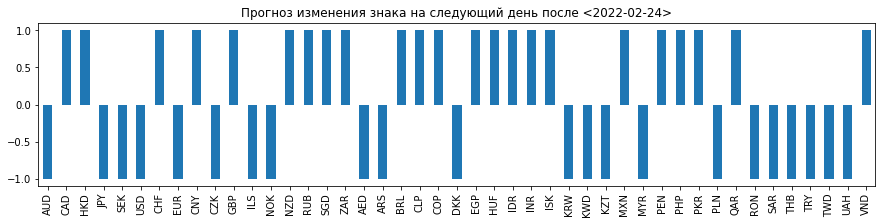

In [14]:
pred = pd.DataFrame(pred_val_out,columns=train_out.columns,index=[str(data.index[-1])]).applymap(lambda x: +1 if x>0 else -1)
pred.to_csv('pred.csv')
_=pred.T.plot.bar(figsize=(15,3),title=f'Прогноз изменения знака на следующий день после <{pred.index[-1]}>',legend=False)
pred

# История прогнозов

In [15]:
# загрузка старого прогноза
try:
    hist_pred = pd.read_csv('../input/abscur-pred-sign-multireg-catboost/hist_pred.csv',index_col=0)
except:
    hist_pred = pred.copy()

# добавление нового прогноза
try:
    hist_pred = pd.concat([hist_pred,pred],ignore_index=False,verify_integrity=True)
except:
    pass

# сохранение прогноза
hist_pred.to_csv('hist_pred.csv')

hist_pred

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
2022-02-04,-1,-1,1,1,-1,1,1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
2022-02-13,1,1,-1,-1,1,1,1,1,1,1,...,-1,1,1,1,1,-1,-1,1,1,-1
2022-02-14,1,1,1,1,1,1,1,1,1,1,...,-1,1,1,1,1,-1,-1,1,1,-1
2022-02-15,1,1,-1,-1,1,-1,1,1,1,1,...,-1,1,-1,-1,1,1,1,1,-1,-1
2022-02-16,1,1,-1,-1,1,-1,-1,-1,1,1,...,-1,-1,-1,1,-1,-1,-1,1,-1,-1
2022-02-17,1,1,1,-1,-1,-1,1,1,1,-1,...,1,-1,1,1,-1,-1,-1,-1,-1,1
2022-02-18,-1,1,-1,-1,-1,1,1,-1,1,-1,...,1,-1,1,-1,-1,-1,-1,-1,1,1
2022-02-20,-1,1,-1,-1,-1,-1,-1,-1,1,-1,...,1,-1,1,-1,-1,-1,-1,-1,1,1
2022-02-21,1,1,1,-1,1,1,1,1,1,1,...,-1,1,1,1,1,-1,1,1,1,-1
2022-02-22,1,1,1,-1,1,1,1,1,1,1,...,-1,1,-1,1,1,1,-1,1,-1,-1


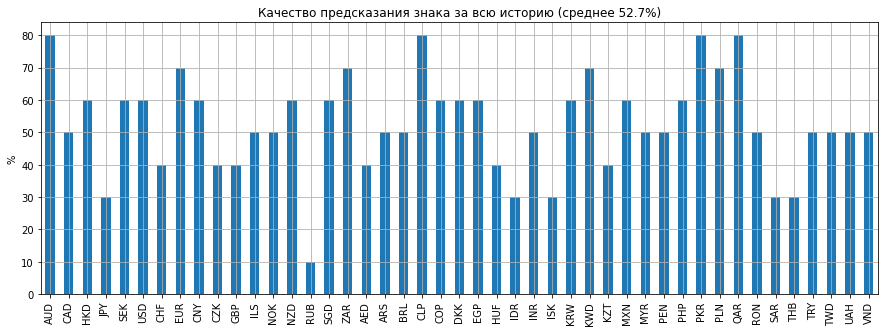

In [16]:
hist_true = d_data.applymap(lambda x: +1 if x>0 else -1).shift(-1)
idx = hist_true.index.intersection(hist_pred.index)
res = ((hist_pred[hist_pred.index.isin(idx)] * hist_true[hist_true.index.isin(idx)]) > 0).mean() * 100
rm = res.mean()
_=res.plot.bar(figsize=(15,5),grid=True,title=f'Качество предсказания знака за всю историю (среднее {rm:.1f}%)',ylabel='%')

# Циклы оптимизации модели генетики

In [17]:
modelGA.fit(10000,echo_time=60,stop_time_sec=8*60*60)
with open("model_ga.pkl",'wb') as fp:
    pickle.dump(modelGA,fp)

2963 {'quality': 0.5205387205387205, 'train_len': 552, 'val_len': 33, 'window': 9}
2964 {'quality': 0.5550135501355014, 'train_len': 569, 'val_len': 41, 'window': 9}
2965 {'quality': 0.5071225071225072, 'train_len': 308, 'val_len': 39, 'window': 9}
2966 {'quality': 0.5228070175438596, 'train_len': 368, 'val_len': 38, 'window': 9}
2967 {'quality': 0.5420875420875421, 'train_len': 562, 'val_len': 33, 'window': 5}
2968 {'quality': 0.5222222222222223, 'train_len': 573, 'val_len': 32, 'window': 9}
2969 {'quality': 0.5326388888888889, 'train_len': 338, 'val_len': 32, 'window': 5}
2970 {'quality': 0.5151515151515151, 'train_len': 597, 'val_len': 33, 'window': 9}
2971 {'quality': 0.5944444444444444, 'train_len': 347, 'val_len': 4, 'window': 9}
2972 {'quality': 0.48148148148148145, 'train_len': 561, 'val_len': 3, 'window': 5}
2973 {'quality': 0.45555555555555555, 'train_len': 342, 'val_len': 4, 'window': 8}
2974 {'quality': 0.5594771241830065, 'train_len': 322, 'val_len': 34, 'window': 5}
2975 

# Отчет по генетике

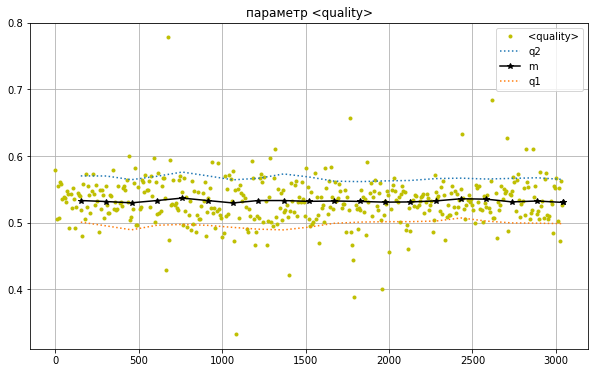

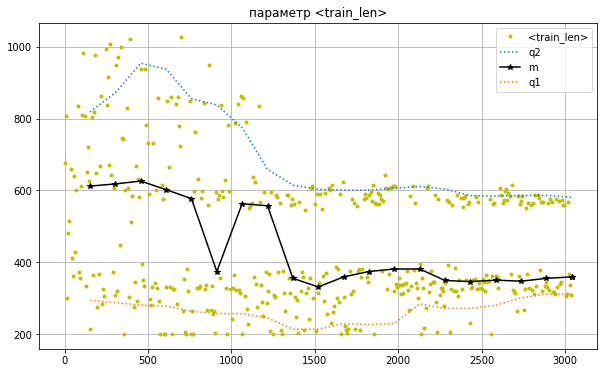

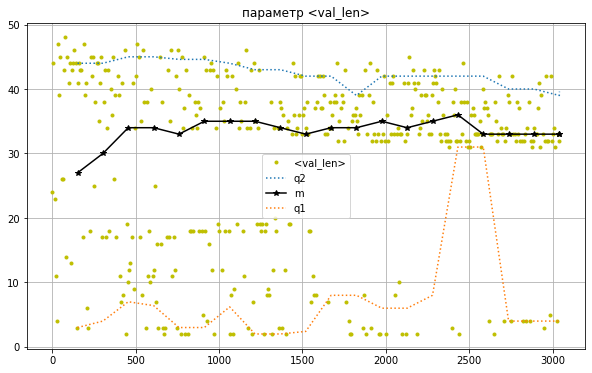

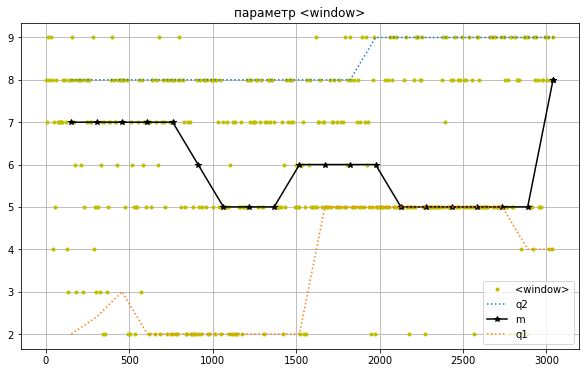

In [18]:
modelGA.plot_hist_new(('quality','train_len','val_len','window'))